In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [5]:
df=pd.read_csv('data&code\weather.csv',index_col=0)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No


In [6]:
df.shape

(142193, 22)

In [7]:
#随机抽取5000条样本进行后续处理
weather = df.sample(n=5000,random_state=0) 
weather.index = range(weather.shape[0]) 
weather.head()


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8,No
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7,No
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0,No
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3,No
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7,No


In [8]:
weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')

In [10]:
weather.Date.value_counts()

2009-08-23    9
2009-07-02    7
2013-07-06    7
2015-08-20    7
2015-11-06    7
2009-02-22    6
2016-08-27    6
2013-05-03    6
2015-10-10    6
2015-02-09    6
2010-02-28    6
2016-03-09    6
2012-06-17    6
2017-05-29    6
2015-10-26    6
2014-01-04    6
2016-04-09    5
2015-06-02    5
2011-01-24    5
2011-11-29    5
2013-11-13    5
2016-07-14    5
2017-02-25    5
2015-02-06    5
2009-09-23    5
2013-12-23    5
2013-10-08    5
2017-06-21    5
2012-06-02    5
2011-05-23    5
             ..
2014-07-21    1
2016-10-02    1
2011-12-05    1
2015-08-10    1
2013-11-05    1
2012-07-31    1
2011-07-26    1
2010-02-25    1
2013-06-01    1
2015-10-29    1
2014-06-27    1
2014-09-20    1
2016-06-21    1
2012-03-12    1
2014-04-26    1
2015-02-25    1
2017-03-25    1
2015-05-06    1
2015-07-07    1
2013-04-22    1
2010-10-29    1
2010-09-24    1
2012-11-16    1
2017-05-01    1
2012-07-17    1
2009-02-06    1
2012-02-20    1
2014-09-17    1
2012-02-21    1
2012-06-07    1
Name: Date, Length: 2486

In [12]:
#查看地点
weather.Location.value_counts()

Newcastle           133
Sydney              125
PerthAirport        125
Darwin              124
NorahHead           122
Hobart              122
Brisbane            121
Perth               121
Adelaide            117
SalmonGums          117
Launceston          116
Wollongong          112
MountGinini         112
PearceRAAF          112
Albany              111
Cairns              109
Canberra            108
Watsonia            108
Ballarat            107
Albury              107
Cobar               107
BadgerysCreek       106
Nuriootpa           106
CoffsHarbour        106
MelbourneAirport    105
NorfolkIsland       105
Richmond            105
Moree               103
AliceSprings        102
SydneyAirport       101
GoldCoast           100
Walpole             100
Witchcliffe          98
Bendigo              97
MountGambier         97
Townsville           97
Tuggeranong          97
Sale                 95
Mildura              94
Penrith              94
Williamtown          91
Portland        

In [13]:
#查看降雨量
weather.Rainfall.value_counts()

0.0     3167
0.2      309
0.4      124
1.0       81
0.6       79
0.8       67
1.4       65
1.2       54
1.8       44
1.6       37
2.2       35
2.6       34
2.4       31
2.0       30
3.0       28
3.6       26
2.8       25
3.2       23
4.0       20
4.2       17
3.8       17
4.8       15
3.4       15
4.6       15
8.0       13
6.0       13
7.8       12
5.6       12
4.4       12
10.0      11
        ... 
21.8       1
6.4        1
43.2       1
45.0       1
21.2       1
74.8       1
25.2       1
58.2       1
20.4       1
27.4       1
14.2       1
32.2       1
23.6       1
46.8       1
73.2       1
53.6       1
19.0       1
29.8       1
57.6       1
11.6       1
53.8       1
24.6       1
19.6       1
38.8       1
38.0       1
33.0       1
8.5        1
27.0       1
42.0       1
54.2       1
Name: Rainfall, Length: 198, dtype: int64

In [14]:
# 查看整体信息
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Date             5000 non-null object
Location         5000 non-null object
MinTemp          4968 non-null float64
MaxTemp          4986 non-null float64
Rainfall         4937 non-null float64
Evaporation      2813 non-null float64
Sunshine         2592 non-null float64
WindGustDir      4640 non-null object
WindGustSpeed    4642 non-null float64
WindDir9am       4650 non-null object
WindDir3pm       4854 non-null object
WindSpeed9am     4951 non-null float64
WindSpeed3pm     4896 non-null float64
Humidity9am      4947 non-null float64
Humidity3pm      4869 non-null float64
Pressure9am      4459 non-null float64
Pressure3pm      4458 non-null float64
Cloud9am         3123 non-null float64
Cloud3pm         2989 non-null float64
Temp9am          4974 non-null float64
Temp3pm          4895 non-null float64
RainTomorrow     5000 non-null object
dtypes: float64(16), object(6)
memory usa

In [15]:
#将特征矩阵和标签Y分开 
X = weather.iloc[:,:-1] 
Y = weather.iloc[:,-1]


In [16]:
X

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2012-10-09,Cairns,17.4,29.0,0.0,3.6,11.1,NNE,33.0,SE,...,11.0,19.0,63.0,61.0,1013.1,1008.9,1.0,0.0,26.1,27.8
1,2011-05-24,Bendigo,6.8,14.4,0.8,0.8,NaN,S,46.0,SW,...,17.0,22.0,80.0,55.0,1010.2,1012.4,5.0,4.0,10.4,12.7
2,2009-08-06,Walpole,10.1,15.4,14.6,NaN,NaN,WSW,31.0,SW,...,13.0,9.0,70.0,61.0,1014.4,1016.1,NaN,NaN,12.3,13.0
3,2009-03-06,Perth,14.4,33.4,0.0,8.0,11.6,SW,41.0,ESE,...,9.0,17.0,40.0,23.0,1019.2,1016.6,1.0,0.0,23.0,32.3
4,2010-07-02,AliceSprings,6.8,14.3,10.0,0.2,7.3,E,28.0,ENE,...,15.0,13.0,92.0,47.0,1027.6,1024.4,7.0,1.0,7.3,13.7
5,2010-06-11,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,...,26.0,17.0,44.0,37.0,1015.9,1012.1,1.0,1.0,23.2,29.1
6,2009-04-03,Watsonia,17.9,25.8,0.0,10.6,2.1,SW,44.0,NNE,...,17.0,19.0,56.0,99.0,1014.4,1014.9,6.0,8.0,24.7,15.3
7,2012-06-20,NorfolkIsland,13.8,20.1,0.0,3.4,6.2,W,65.0,WNW,...,19.0,15.0,62.0,81.0,1016.5,1014.8,1.0,7.0,18.2,16.0
8,2013-03-11,NorahHead,20.2,26.7,0.4,NaN,NaN,ESE,31.0,S,...,2.0,11.0,86.0,64.0,1020.4,1019.6,NaN,NaN,22.7,25.8
9,2015-11-15,Launceston,8.5,20.2,0.0,NaN,NaN,NW,33.0,NNE,...,6.0,20.0,70.0,47.0,NaN,NaN,1.0,8.0,12.7,19.2


In [17]:
Y

0        No
1        No
2        No
3        No
4        No
5        No
6       Yes
7       Yes
8        No
9        No
10       No
11       No
12       No
13       No
14      Yes
15       No
16       No
17       No
18       No
19       No
20       No
21       No
22       No
23       No
24       No
25       No
26      Yes
27       No
28       No
29      Yes
       ... 
4970    Yes
4971     No
4972    Yes
4973     No
4974    Yes
4975    Yes
4976     No
4977     No
4978     No
4979    Yes
4980    Yes
4981    Yes
4982     No
4983     No
4984     No
4985     No
4986     No
4987    Yes
4988     No
4989     No
4990     No
4991     No
4992     No
4993     No
4994     No
4995    Yes
4996     No
4997     No
4998     No
4999    Yes
Name: RainTomorrow, Length: 5000, dtype: object

In [18]:
np.unique(Y)

array(['No', 'Yes'], dtype=object)

In [21]:
X.isnull().sum()

Date                0
Location            0
MinTemp            32
MaxTemp            14
Rainfall           63
Evaporation      2187
Sunshine         2408
WindGustDir       360
WindGustSpeed     358
WindDir9am        350
WindDir3pm        146
WindSpeed9am       49
WindSpeed3pm      104
Humidity9am        53
Humidity3pm       131
Pressure9am       541
Pressure3pm       542
Cloud9am         1877
Cloud3pm         2011
Temp9am            26
Temp3pm           105
dtype: int64

In [22]:
X.isnull().mean()

Date             0.0000
Location         0.0000
MinTemp          0.0064
MaxTemp          0.0028
Rainfall         0.0126
Evaporation      0.4374
Sunshine         0.4816
WindGustDir      0.0720
WindGustSpeed    0.0716
WindDir9am       0.0700
WindDir3pm       0.0292
WindSpeed9am     0.0098
WindSpeed3pm     0.0208
Humidity9am      0.0106
Humidity3pm      0.0262
Pressure9am      0.1082
Pressure3pm      0.1084
Cloud9am         0.3754
Cloud3pm         0.4022
Temp9am          0.0052
Temp3pm          0.0210
dtype: float64

In [23]:
#分训练集和测试集 
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420)


In [25]:
Xtrain.shape

(3500, 21)

In [27]:
Xtest.shape

(1500, 21)

In [28]:
Ytrain.shape

(3500,)

In [29]:
Ytest.shape

(1500,)

In [30]:
#恢复索引 
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])


In [32]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2017-06-14,GoldCoast,16.3,20.6,17.8,NaN,NaN,SE,72.0,S,...,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2


In [33]:
#是否有样本不平衡问题？ 
Ytrain.value_counts() 

No     2710
Yes     790
Name: RainTomorrow, dtype: int64

In [34]:
Ytest.value_counts()


No     1137
Yes     363
Name: RainTomorrow, dtype: int64

In [46]:
#将标签编码 
from sklearn.preprocessing import LabelEncoder # 标签编码专用包
from sklearn.preprocessing import OrdinalEncoder # 特征编码专用包
encorder = LabelEncoder().fit(Ytrain) 
Ytrain = pd.DataFrame(encorder.transform(Ytrain)) 
Ytest = pd.DataFrame(encorder.transform(Ytest))


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [47]:
encoder=LabelEncoder().fit(Ytrain)

In [48]:
encoder.classes_

array([0, 1], dtype=int64)

In [49]:
encoder.transform(Ytrain)

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
encoder.transform(Ytest)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [51]:
Ytrain = pd.DataFrame(encorder.transform(Ytrain)) # 不能运行两遍


In [53]:
Ytest = pd.DataFrame(encorder.transform(Ytest))


In [54]:
Ytrain.head()

,0
0,0
1,0
2,1
3,0
4,0


In [56]:
Ytest.head()

,0
0,0
1,0
2,0
3,0
4,0


In [57]:
#描述性统计
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T 

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3477.0,12.340236,6.384294,-6.9,-2.024,2.1,4.3,7.700,12.1,17.0,20.9,25.824,29.1
MaxTemp,3492.0,23.232904,6.992256,-4.1,8.900,12.7,14.6,18.200,22.7,28.1,32.8,39.600,43.7
Rainfall,3460.0,2.106618,6.570495,0.0,0.000,0.0,0.0,0.000,0.0,0.8,6.0,35.400,102.0
Evaporation,1986.0,5.398489,3.837948,0.0,0.400,1.0,1.4,2.725,4.8,7.4,9.8,17.430,52.4
Sunshine,1835.0,7.723869,3.691531,0.0,0.000,0.4,2.0,5.100,8.5,10.6,12.0,13.400,14.3
WindGustSpeed,3254.0,39.878611,13.492322,9.0,15.000,20.0,24.0,31.000,39.0,46.0,57.0,81.000,115.0
WindSpeed9am,3470.0,13.924784,8.861956,0.0,0.000,0.0,4.0,7.000,13.0,19.0,26.0,39.000,52.0
WindSpeed3pm,3426.0,18.765032,8.915825,0.0,2.000,6.0,7.0,13.000,19.0,24.0,30.0,43.000,78.0
Humidity9am,3460.0,68.844509,18.918369,5.0,18.000,35.0,44.0,57.000,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3405.0,51.628781,20.705426,1.0,9.000,17.0,24.0,37.000,52.0,65.0,79.6,97.960,100.0


In [58]:
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1491.0,12.211335,6.458887,-6.3,-2.500,1.50,3.90,7.6,12.2,16.800,20.70,25.610,28.5
MaxTemp,1494.0,23.330857,7.380122,-0.6,7.686,12.60,14.40,18.0,22.7,28.775,33.50,40.500,44.4
Rainfall,1477.0,2.338456,8.114066,0.0,0.000,0.00,0.00,0.0,0.0,0.800,6.20,31.632,164.2
Evaporation,827.0,5.492745,4.007532,0.0,0.200,0.80,1.40,2.6,4.8,7.600,10.40,16.000,58.5
Sunshine,757.0,7.756803,3.815881,0.0,0.000,0.48,1.66,4.9,8.6,10.700,12.30,13.400,14.0
WindGustSpeed,1388.0,40.164986,14.144410,11.0,15.000,20.00,24.00,30.0,39.0,48.000,57.00,87.000,102.0
WindSpeed9am,1481.0,14.135719,9.018514,0.0,0.000,0.00,4.00,7.0,13.0,19.000,26.00,37.400,72.0
WindSpeed3pm,1470.0,18.759184,9.002335,0.0,2.000,6.00,8.80,13.0,19.0,24.000,30.00,44.620,65.0
Humidity9am,1487.0,67.854069,19.342026,8.0,16.860,32.30,42.60,56.0,68.0,83.000,94.00,100.000,100.0
Humidity3pm,1464.0,50.962432,21.100400,4.0,8.000,15.00,23.00,35.0,52.0,65.000,79.00,97.370,100.0


In [59]:
Xtrain.shape 

(3500, 21)

In [60]:
Ytrain.shape 

(3500, 1)

In [61]:
Xtest.shape

(1500, 21)

In [62]:
Ytest.shape

(1500, 1)

In [69]:
#提取出所有的数值型特征的列名 ,每一列的平均值
col = Xtrain.mean().index
col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [70]:
Xtrain.mean()

MinTemp            12.340236
MaxTemp            23.232904
Rainfall            2.106618
Evaporation         5.398489
Sunshine            7.723869
WindGustSpeed      39.878611
WindSpeed9am       13.924784
WindSpeed3pm       18.765032
Humidity9am        68.844509
Humidity3pm        51.628781
Pressure9am      1017.538520
Pressure3pm      1015.140542
Cloud9am            4.463624
Cloud3pm            4.540132
Temp9am            17.058115
Temp3pm            21.671979
dtype: float64

In [66]:
Xtrain.loc[:,col]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,19.0,29.8,0.0,7.6,7.6,28.0,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,5.8,12.6,0.0,3.4,6.8,31.0,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,16.3,20.6,17.8,NaN,NaN,72.0,37.0,52.0,100.0,100.0,1023.3,1022.7,NaN,NaN,18.1,20.0
3,6.6,11.8,2.6,1.2,2.0,39.0,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
4,18.0,34.6,0.0,NaN,NaN,39.0,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
5,13.3,23.2,0.0,NaN,NaN,35.0,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4
6,9.1,25.5,0.0,NaN,NaN,35.0,6.0,4.0,95.0,41.0,1020.8,1014.9,3.0,1.0,14.0,25.2
7,8.5,10.1,1.0,2.0,NaN,44.0,15.0,20.0,96.0,90.0,1013.3,1012.9,8.0,8.0,9.9,8.5
8,21.4,31.1,0.0,10.4,12.3,31.0,7.0,17.0,63.0,58.0,1009.5,1007.1,2.0,1.0,28.8,30.4
9,9.4,21.7,0.0,NaN,NaN,50.0,20.0,35.0,66.0,36.0,1027.5,1022.9,NaN,NaN,14.2,20.3


In [71]:
#查看训练集各列异常值的比例 
(np.abs((Xtrain.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtrain.shape[0]
#几倍标准差

MinTemp          0.000286
MaxTemp          0.002286
Rainfall         0.021714
Evaporation      0.006286
Sunshine         0.000000
WindGustSpeed    0.010571
WindSpeed9am     0.009714
WindSpeed3pm     0.006000
Humidity9am      0.003714
Humidity3pm      0.000000
Pressure9am      0.003429
Pressure3pm      0.002857
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.001143
Temp3pm          0.002571
dtype: float64

In [ ]:
#少数存在，于是采取删除的策略 
#注意如果删除特征矩阵，则必须连对应的标签一起删除，特征矩阵的行和标签的行必须要一一对应 
#提取出所有训练集所有异常值的索引 

In [72]:
deltrain = [] 
for i in col:
    bool_ = np.abs((Xtrain.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtrain[bool_].index
    deltrain.extend(list(ind)) 

In [73]:
#去重之后有异常值的行索引 
deltrain1 = list(set(deltrain)) 
len(deltrain1)


199

In [74]:
#查看测试集各列缺失值（注意这里的均值和方差需要用训练集的）
(np.abs((Xtest.loc[:,col] - Xtrain.mean())/Xtrain.std())>3).sum()/Xtest.shape[0]


MinTemp          0.000000
MaxTemp          0.004000
Rainfall         0.024667
Evaporation      0.004667
Sunshine         0.000000
WindGustSpeed    0.013333
WindSpeed9am     0.007333
WindSpeed3pm     0.010000
Humidity9am      0.004667
Humidity3pm      0.000000
Pressure9am      0.004000
Pressure3pm      0.004000
Cloud9am         0.000000
Cloud3pm         0.000000
Temp9am          0.000667
Temp3pm          0.005333
dtype: float64

In [75]:
#提取出测试集的所有异常值的索引
deltest = []
for i in col:
    bool_ = np.abs((Xtest.loc[:,i] - Xtrain.loc[:,i].mean())/Xtrain.loc[:,i].std())>3
    ind = Xtest[bool_].index
    deltest.extend(list(ind))


In [76]:
len(deltest)

124

In [77]:
len(set(deltest))

90

In [78]:
#去重之后有异常值的行索引
deltest1 = list(set(deltest)) 

In [79]:
#删除异常值（特征和标签都要删除） 
Xtrain = Xtrain.drop(index=deltrain1) 
Ytrain = Ytrain.drop(index=deltrain1) 
Xtest = Xtest.drop(index=deltest1) 
Ytest = Ytest.drop(index=deltest1)


In [80]:
Xtrain.shape

(3301, 21)

In [81]:
Xtest.shape

(1410, 21)

In [85]:
Ytest.shape

(1410, 1)

In [82]:
#进行任何行删除之后，千万记得要恢复索引 
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])


In [83]:
Xtrain.head() 


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4


In [84]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,2.0,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,0.0,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,9.0,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,17.0,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,15.0,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8


In [89]:
Xtrainc = Xtrain.copy()
Xtrainc

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,13.0,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,15.0,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,11.0,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,2.0,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,17.0,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4
5,2014-09-14,Richmond,9.1,25.5,0.0,NaN,NaN,SE,35.0,ENE,...,6.0,4.0,95.0,41.0,1020.8,1014.9,3.0,1.0,14.0,25.2
6,2016-08-02,Cobar,8.5,10.1,1.0,2.0,NaN,SW,44.0,SSW,...,15.0,20.0,96.0,90.0,1013.3,1012.9,8.0,8.0,9.9,8.5
7,2013-01-14,Cairns,21.4,31.1,0.0,10.4,12.3,NNE,31.0,E,...,7.0,17.0,63.0,58.0,1009.5,1007.1,2.0,1.0,28.8,30.4
8,2013-05-11,Ballarat,9.4,21.7,0.0,NaN,NaN,N,50.0,NNE,...,20.0,35.0,66.0,36.0,1027.5,1022.9,NaN,NaN,14.2,20.3
9,2015-10-01,Launceston,6.2,15.3,0.0,NaN,NaN,NNW,48.0,NNW,...,24.0,28.0,71.0,77.0,NaN,NaN,8.0,8.0,11.5,14.0


In [93]:
Xtrain.iloc[:,0].value_counts() 

2015-11-06    6
2009-08-23    6
2015-10-10    5
2009-11-29    5
2011-09-11    5
2016-02-21    5
2015-01-18    5
2015-07-13    5
2009-08-14    5
2013-08-22    5
2015-02-06    5
2015-02-09    5
2009-02-22    5
2013-09-10    4
2014-10-29    4
2009-02-01    4
2015-06-24    4
2011-08-11    4
2012-06-15    4
2014-09-05    4
2015-10-26    4
2014-12-12    4
2011-07-21    4
2009-01-05    4
2016-12-10    4
2017-02-25    4
2009-01-20    4
2012-11-29    4
2017-05-29    4
2013-09-09    4
             ..
2015-02-03    1
2008-08-02    1
2017-06-23    1
2009-06-07    1
2015-03-17    1
2014-05-08    1
2014-07-25    1
2015-06-02    1
2013-09-27    1
2014-03-16    1
2008-04-21    1
2009-02-27    1
2011-09-01    1
2012-06-06    1
2011-03-22    1
2011-03-06    1
2011-12-04    1
2013-04-27    1
2013-10-11    1
2015-03-18    1
2013-11-06    1
2012-05-23    1
2009-07-12    1
2017-04-03    1
2012-09-10    1
2009-12-06    1
2012-11-08    1
2016-09-18    1
2013-12-07    1
2010-10-21    1
Name: Date, Length: 2025

In [94]:
# 查看重复值
Xtrain.duplicated().sum()

0

In [95]:
Xtrain.Date.value_counts().count()

2025

In [97]:
Xtrain["Rainfall"].value_counts()

0.0     2157
0.2      209
0.4       90
1.0       54
0.6       48
0.8       45
1.4       43
1.2       35
1.8       31
1.6       28
2.2       21
2.0       21
2.4       21
2.6       21
3.6       20
3.0       19
3.2       15
2.8       15
3.8       13
6.0       12
4.0       11
4.8       10
3.4       10
4.6        9
4.2        9
9.8        9
5.8        8
7.2        8
5.6        8
11.8       7
        ... 
8.2        2
21.6       2
21.0       2
17.4       2
20.0       2
19.8       1
0.3        1
21.2       1
1.1        1
19.0       1
15.4       1
18.4       1
19.2       1
2.3        1
21.8       1
19.6       1
5.5        1
18.0       1
14.0       1
8.5        1
15.8       1
6.9        1
11.6       1
18.6       1
13.6       1
14.2       1
16.4       1
18.8       1
19.4       1
17.8       1
Name: Rainfall, Length: 113, dtype: int64

In [99]:
Xtrain["Rainfall"].isnull().sum()

38

In [100]:
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes" 
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No" 
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan


In [101]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2016-03-14,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,2014-09-15,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,2015-07-17,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,2015-01-12,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2017-02-25,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [103]:
Xtrain.RainToday.value_counts()

No     2555
Yes     708
Name: RainToday, dtype: int64

In [104]:
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes" 
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No" 
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan


In [105]:
Xtest.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2015-07-16,Launceston,-0.6,10.8,0.0,NaN,NaN,SE,20.0,E,...,7.0,94.0,54.0,NaN,NaN,NaN,NaN,1.9,10.6,No
1,2015-04-28,Adelaide,8.7,16.7,0.0,1.6,NaN,SE,22.0,NaN,...,9.0,68.0,46.0,1030.8,1028.4,NaN,NaN,14.1,16.0,No
2,2015-03-21,Portland,7.7,19.0,0.0,5.4,10.3,E,33.0,SE,...,15.0,62.0,50.0,1027.7,1026.0,8.0,1.0,13.9,18.4,No
3,2009-02-22,Portland,14.8,21.7,0.0,2.2,12.5,ESE,33.0,ESE,...,19.0,61.0,47.0,1018.5,1015.2,6.0,3.0,15.9,21.5,No
4,2017-02-20,Portland,10.8,18.2,2.0,NaN,NaN,SSW,37.0,SW,...,22.0,74.0,55.0,1015.8,1016.7,7.0,8.0,13.1,16.8,Yes


In [106]:
Xtest.RainToday.value_counts()

No     1084
Yes     304
Name: RainToday, dtype: int64

In [107]:
#提取月份
int(Xtrain.loc[0,"Date"].split("-")[1]) 

3

In [113]:
Xtrain.loc[0,"Date"].split("-")

['2016', '03', '14']

In [114]:
#循环提取月份
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1])) 

In [138]:
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})


In [115]:
Xtrain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [116]:
Xtrain = Xtrain.rename(columns={"Date":"Month"})


In [117]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3,Williamtown,19.0,29.8,0.0,7.6,7.6,SE,28.0,NW,...,19.0,83.0,58.0,1016.4,1013.5,7.0,3.0,23.3,29.2,No
1,9,Hobart,5.8,12.6,0.0,3.4,6.8,ESE,31.0,N,...,19.0,NaN,46.0,1019.0,1016.6,7.0,1.0,8.1,11.6,No
2,7,Watsonia,6.6,11.8,2.6,1.2,2.0,S,39.0,SW,...,20.0,100.0,81.0,1022.0,1021.7,8.0,7.0,8.1,11.5,Yes
3,1,Uluru,18.0,34.6,0.0,NaN,NaN,SW,39.0,E,...,17.0,64.0,32.0,1006.7,1003.1,NaN,1.0,24.6,33.2,No
4,2,Launceston,13.3,23.2,0.0,NaN,NaN,NNW,35.0,SSE,...,9.0,43.0,33.0,NaN,NaN,6.0,1.0,14.5,22.4,No


In [118]:
# 处理分类型变量缺失值
#查看缺失值的缺失情况 
Xtrain.isnull().mean()


Month            0.000000
Location         0.000000
MinTemp          0.006968
MaxTemp          0.002121
Rainfall         0.011512
Evaporation      0.432899
Sunshine         0.475613
WindGustDir      0.069979
WindGustSpeed    0.069676
WindDir9am       0.073614
WindDir3pm       0.029991
WindSpeed9am     0.008482
WindSpeed3pm     0.021509
Humidity9am      0.010906
Humidity3pm      0.027264
Pressure9am      0.102999
Pressure3pm      0.103302
Cloud9am         0.369888
Cloud3pm         0.396547
Temp9am          0.004847
Temp3pm          0.021206
RainToday        0.011512
dtype: float64

In [119]:
#首先找出，分类型特征都有哪些
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()# tolist变成列表


In [120]:
Xtrain.dtypes

Month              int64
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
dtype: object

In [122]:
Xtrain.columns[Xtrain.dtypes == "object"]

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object')

In [123]:
cloud = ["Cloud9am","Cloud3pm"] 
cate = cate + cloud 
cate


['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Cloud9am',
 'Cloud3pm']

In [124]:
#对于分类型特征，我们使用众数来进行填补 
from sklearn.impute import SimpleImputer # 导入填充缺失值的包


In [125]:
si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")# 实例化
#注意，我们使用训练集数据来训练我们的填补器

In [126]:
si.fit(Xtrain.loc[:,cate])# 这里本质是生成每一列的众数
# 为什么要先实例化？

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [127]:
#然后我们用训练集中的众数来同时填补训练集和测试集 
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate]) 
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])


In [128]:
#查看分类型特征是否依然存在缺失值 
Xtrain.loc[:,cate].isnull().mean() 

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [129]:
Xtest.loc[:,cate].isnull().mean()


Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [130]:
#将所有的分类型变量编码为数字，一个类别是一个数字 
from sklearn.preprocessing import OrdinalEncoder 
oe = OrdinalEncoder()#实例化


In [131]:
#利用训练集进行fit 
oe = oe.fit(Xtrain.loc[:,cate])# 对每一列进行编码，并记录对应关系


In [132]:
#用训练集的编码结果来编码训练和测试特征矩阵 
#在这里如果测试特征矩阵报错，就说明测试集中出现了训练集中从未见过的类别 
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate]) 
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])


In [133]:
Xtrain.loc[:,cate].head() 

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,Cloud9am,Cloud3pm
0,45.0,9.0,7.0,9.0,0.0,7.0,3.0
1,15.0,2.0,3.0,9.0,0.0,7.0,1.0
2,44.0,8.0,12.0,11.0,1.0,8.0,7.0
3,41.0,12.0,0.0,12.0,0.0,7.0,1.0
4,17.0,6.0,10.0,3.0,0.0,6.0,1.0


In [ ]:
#  处理连续型变量：填补缺失值 

In [136]:
col = Xtrain.columns.tolist()
for i in cate:
    col.remove(i)

col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [139]:
#实例化模型，填补策略为"mean"表示均值 
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean") 
#用训练集来fit模型 
impmean = impmean.fit(Xtrain.loc[:,col]) 
#分别在训练集和测试集上进行均值填补
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col]) 

In [140]:
Xtest.head()


,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-0.6,10.8,0.0,5.173344,7.826516,9.0,20.0,0.0,...,7.0,94.0,54.0,1017.898109,1015.46,7.0,7.0,1.9,10.6,0.0
1,4.0,0.0,8.7,16.7,0.0,1.600000,7.826516,9.0,22.0,3.0,...,9.0,68.0,46.0,1030.800000,1028.40,7.0,7.0,14.1,16.0,0.0
2,3.0,33.0,7.7,19.0,0.0,5.400000,10.300000,0.0,33.0,9.0,...,15.0,62.0,50.0,1027.700000,1026.00,8.0,1.0,13.9,18.4,0.0
3,2.0,33.0,14.8,21.7,0.0,2.200000,12.500000,2.0,33.0,2.0,...,19.0,61.0,47.0,1018.500000,1015.20,6.0,3.0,15.9,21.5,0.0
4,2.0,33.0,10.8,18.2,2.0,5.173344,7.826516,11.0,37.0,12.0,...,22.0,74.0,55.0,1015.800000,1016.70,7.0,8.0,13.1,16.8,1.0


In [141]:
Xtest.isnull().sum()


Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [142]:
Xtrain.isnull().sum()

Month            0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
dtype: int64

In [143]:
# 处理连续变量量纲问题

In [144]:
Xtrain.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,3301.0,6.360497,3.431097,1.0,3.000000,6.000000,9.0,12.0
Location,3301.0,23.456831,14.057405,0.0,11.000000,23.000000,35.0,48.0
MinTemp,3301.0,12.254912,6.291149,-5.3,7.700000,12.000000,16.8,29.1
MaxTemp,3301.0,23.285641,6.788046,3.4,18.300000,22.800000,28.1,42.9
Rainfall,3301.0,1.299081,3.327557,0.0,0.000000,0.000000,0.6,21.8
Evaporation,3301.0,5.173344,2.381357,0.0,4.200000,5.173344,5.2,16.6
Sunshine,3301.0,7.826516,2.627575,0.0,7.826516,7.826516,8.9,14.3
WindGustDir,3301.0,7.771584,4.520786,0.0,4.000000,9.000000,11.0,15.0
WindGustSpeed,3301.0,38.749267,11.634887,9.0,31.000000,38.749267,44.0,80.0
WindDir9am,3301.0,6.932445,4.501917,0.0,3.000000,7.000000,11.0,15.0


In [145]:
col.remove("Month")
col


['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [146]:
from sklearn.preprocessing import StandardScaler# 导入进行标准化的包


In [147]:
# 对连续型变量进行数据标准化
ss = StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])


In [148]:
Xtrain.head() 

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.0,45.0,1.072318,0.959826,-0.390460,1.019177,-8.622049e-02,9.0,-0.924022,7.0,...,0.084288,0.775155,0.348282,-2.323437e-01,-3.062943e-01,7.0,3.0,0.995825,1.134599,0.0
1,9.0,15.0,-1.026186,-1.574423,-0.390460,-0.744791,-3.907299e-01,2.0,-0.666138,3.0,...,0.084288,0.000000,-0.260446,1.708938e-01,1.781508e-01,7.0,1.0,-1.415539,-1.543087,0.0
2,7.0,44.0,-0.899004,-1.692296,0.391013,-1.668774,-2.217786e+00,8.0,0.021553,12.0,...,0.205503,1.701299,1.515011,6.361679e-01,9.751411e-01,8.0,7.0,-1.415539,-1.558301,1.0
3,1.0,41.0,0.913340,1.667059,-0.390460,0.000000,-6.761467e-16,12.0,0.021553,0.0,...,-0.158143,-0.259948,-0.970628,-1.736730e+00,-1.931530e+00,7.0,1.0,1.202060,1.743163,0.0
4,2.0,17.0,0.166146,-0.012618,-0.390460,0.000000,-6.761467e-16,6.0,-0.322292,10.0,...,-1.127866,-1.404009,-0.919901,-1.763185e-14,-1.776614e-14,6.0,1.0,-0.400228,0.100038,0.0


In [149]:
Xtest.head()


,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,7.0,17.0,-2.043643,-1.839636,-0.390460,0.000000,0.000000,9.0,-1.611714,0.0,...,-1.370297,1.374425,0.145373,0.000000,0.000000,7.0,7.0,-2.399122,-1.695228,0.0
1,4.0,0.0,-0.565151,-0.970329,-0.390460,-1.500777,0.000000,9.0,-1.439791,3.0,...,-1.127866,-0.042031,-0.260446,2.000972,2.022168,7.0,7.0,-0.463685,-0.873665,0.0
2,3.0,33.0,-0.724129,-0.631447,-0.390460,0.095194,0.941499,0.0,-0.494215,9.0,...,-0.400574,-0.368906,-0.057536,1.520189,1.647113,8.0,1.0,-0.495413,-0.508526,0.0
3,2.0,33.0,0.404612,-0.233628,-0.390460,-1.248782,1.778900,2.0,-0.494215,2.0,...,0.084288,-0.423385,-0.209718,0.093348,-0.040631,6.0,3.0,-0.178129,-0.036889,0.0
4,2.0,33.0,-0.231298,-0.749319,0.210673,0.000000,0.000000,11.0,-0.150370,12.0,...,0.447934,0.284843,0.196100,-0.325399,0.193778,7.0,8.0,-0.622327,-0.751952,1.0


In [150]:
# 建议做到这一步后，就把处理后的数据导出去，备份一下，以防后面模型建错，可以重新导进来
#Xtrain.to_csv('weather_Xtrain.csv',encoding='utf-8')
#Xtest.to_csv('weather_Xtest.csv',encoding='utf-8')
#Ytrain.to_csv('weather_Ytrain.csv',encoding='utf-8')
#Ytest.to_csv('weather_Ytest.csv',encoding='utf-8')

In [9]:
Xtrain=pd.read_csv('weather_Xtrain.csv',index_col=0)

In [10]:
Ytrain=pd.read_csv('weather_Ytrain.csv',index_col=0)

In [11]:
Xtest=pd.read_csv('weather_Xtest.csv',index_col=0)
Ytest=pd.read_csv('weather_Ytest.csv',index_col=0)

In [12]:
Xtrain.head()

,Month,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,3.0,45.0,1.072318,0.959826,-0.390460,1.019177,-8.622049e-02,9.0,-0.924022,7.0,...,0.084288,0.775155,0.348282,-2.323437e-01,-3.062943e-01,7.0,3.0,0.995825,1.134599,0.0
1,9.0,15.0,-1.026186,-1.574423,-0.390460,-0.744791,-3.907299e-01,2.0,-0.666138,3.0,...,0.084288,0.000000,-0.260446,1.708938e-01,1.781508e-01,7.0,1.0,-1.415539,-1.543087,0.0
2,7.0,44.0,-0.899004,-1.692296,0.391013,-1.668774,-2.217786e+00,8.0,0.021553,12.0,...,0.205503,1.701299,1.515011,6.361679e-01,9.751411e-01,8.0,7.0,-1.415539,-1.558301,1.0
3,1.0,41.0,0.913340,1.667059,-0.390460,0.000000,-6.761467e-16,12.0,0.021553,0.0,...,-0.158143,-0.259948,-0.970628,-1.736730e+00,-1.931530e+00,7.0,1.0,1.202060,1.743163,0.0
4,2.0,17.0,0.166146,-0.012618,-0.390460,0.000000,-6.761467e-16,6.0,-0.322292,10.0,...,-1.127866,-1.404009,-0.919901,-1.763185e-14,-1.776614e-14,6.0,1.0,-0.400228,0.100038,0.0


In [13]:
Ytrain.head()

,0
0,0
1,0
2,0
3,0
4,0


In [14]:
from time import time 
import datetime 
from sklearn.svm import SVC 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import roc_auc_score, recall_score


In [16]:
#建模
#对标签进行转换，把二维转为一维（dataframe是二维的）方法一
Ytrain = Ytrain.iloc[:,0].values
#方法二
Ytest = Ytest.iloc[:,0].ravel()
# 以上转换不能重复执行，如果后面出现警告让你把标签转为一维的，就是没有执行上面的命令
#执行转换为一维的命令，还要记得要赋值（把转换后的结果重新赋值给Ytrain和Ytest）

In [17]:
Ytrain

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
Ytest

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [19]:
#核函数学习曲线
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
                ,gamma="auto"
                ,degree = 1
                ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" %(kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

linear 's testing accuracy 0.828369, recall is 0.386792', auc is 0.851239
00:03:010567
poly 's testing accuracy 0.826241, recall is 0.364780', auc is 0.852003
00:00:670040
rbf 's testing accuracy 0.798582, recall is 0.125786', auc is 0.751071
00:01:569770
sigmoid 's testing accuracy 0.743262, recall is 0.037736', auc is 0.438671
00:00:837176


In [20]:
#最求最高Recall 

In [21]:
#增加class_weight 参数
for kernel in ["linear","poly","rbf","sigmoid"]:
    times = time()
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,class_weight = "balanced"
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


linear 's testing accuracy 0.790071, recall is 0.761006', auc is 0.856095
00:03:898605
poly 's testing accuracy 0.785816, recall is 0.742138', auc is 0.855824
00:01:007282
rbf 's testing accuracy 0.792908, recall is 0.380503', auc is 0.754343
00:02:002645
sigmoid 's testing accuracy 0.755319, recall is 0.015723', auc is 0.439958
00:01:793271


In [22]:
times = time()
clf = SVC(kernel = "linear" 
          ,gamma="auto" 
          ,class_weight = {1:10} #注意，这里写的其实是，类别1：10，隐藏了类别0：1这个比 例 
         ).fit(Xtrain, Ytrain) 
result = clf.predict(Xtest)
score = clf.score(Xtest,Ytest)
recall = recall_score(Ytest, result)
auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
print("%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

sigmoid 's testing accuracy 0.641135, recall is 0.930818', auc is 0.857543
00:07:545889


In [23]:
 #追求最高准确率 


In [25]:
valuec = pd.Series(Ytest).value_counts()
valuec
valuec[0]/valuec.sum()


0.774468085106383

In [28]:
valuec

0    1092
1     318
dtype: int64

In [26]:
#查看模型的特异度 
from sklearn.metrics import confusion_matrix as CM 
clf = SVC(kernel = "linear"
          ,gamma="auto"
         ).fit(Xtrain, Ytrain) 

In [27]:
result = clf.predict(Xtest)
cm = CM(Ytest,result,labels=(1,0))
cm
# 0是多数类

array([[ 123,  195],
       [  47, 1045]], dtype=int64)

In [29]:
specificity = cm[1,1]/cm[1,:].sum()
specificity #几乎所有的0都被判断正确了，还有不少1也被判断正确了


0.956959706959707

In [30]:
irange = np.linspace(0.01,0.05,10)
for i in irange:
    times = time()
    clf = SVC(kernel = "linear" 
              ,gamma="auto" 
              ,class_weight = {1:1+i} 
             ).fit(Xtrain, Ytrain) 
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest) 
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (1+i,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


under ratio 1:1.010000 testing accuracy 0.827660, recall is 0.386792', auc is 0.851274
00:02:751651
under ratio 1:1.014444 testing accuracy 0.828369, recall is 0.389937', auc is 0.851150
00:02:729558
under ratio 1:1.018889 testing accuracy 0.828369, recall is 0.393082', auc is 0.851196
00:02:833449
under ratio 1:1.023333 testing accuracy 0.828369, recall is 0.393082', auc is 0.851159
00:02:900220
under ratio 1:1.027778 testing accuracy 0.828369, recall is 0.393082', auc is 0.851329
00:02:889305
under ratio 1:1.032222 testing accuracy 0.829787, recall is 0.399371', auc is 0.851375
00:03:333092
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851381
00:03:055273
under ratio 1:1.041111 testing accuracy 0.827660, recall is 0.399371', auc is 0.851455
00:03:061251
under ratio 1:1.045556 testing accuracy 0.828369, recall is 0.402516', auc is 0.851300
00:03:143526
under ratio 1:1.050000 testing accuracy 0.829787, recall is 0.408805', auc is 0.851309
00:02:988013


In [31]:
# 细化
irange_ = np.linspace(0.03,0.04,10)
for i in irange_:
    times = time()
    clf = SVC(kernel = "linear" 
              ,gamma="auto" 
              ,class_weight = {1:1+i}
             ).fit(Xtrain, Ytrain) 
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("under ratio 1:%f testing accuracy %f, recall is %f', auc is %f" % (1+i,score,recall,auc)) 
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under ratio 1:1.030000 testing accuracy 0.829078, recall is 0.396226', auc is 0.851409
00:02:906228
under ratio 1:1.031111 testing accuracy 0.829078, recall is 0.396226', auc is 0.851372
00:03:052267
under ratio 1:1.032222 testing accuracy 0.829787, recall is 0.399371', auc is 0.851375
00:03:301328
under ratio 1:1.033333 testing accuracy 0.829078, recall is 0.399371', auc is 0.851375
00:03:306224
under ratio 1:1.034444 testing accuracy 0.829787, recall is 0.399371', auc is 0.851398
00:02:953107
under ratio 1:1.035556 testing accuracy 0.829787, recall is 0.399371', auc is 0.851383
00:03:053833
under ratio 1:1.036667 testing accuracy 0.829787, recall is 0.399371', auc is 0.851381
00:03:044859
under ratio 1:1.037778 testing accuracy 0.827660, recall is 0.396226', auc is 0.851314
00:03:035887
under ratio 1:1.038889 testing accuracy 0.827660, recall is 0.399371', auc is 0.851427
00:02:772588
under ratio 1:1.040000 testing accuracy 0.827660, recall is 0.399371', auc is 0.851415
00:02:801481


3.0 0.8312056737588652
3.2222222222222223 0.8312056737588652
3.4444444444444446 0.8304964539007093
3.6666666666666665 0.8304964539007093
3.888888888888889 0.8304964539007093
4.111111111111111 0.8297872340425532
4.333333333333333 0.8304964539007093
4.555555555555555 0.8304964539007093
4.777777777777778 0.8304964539007093
5.0 0.8304964539007093


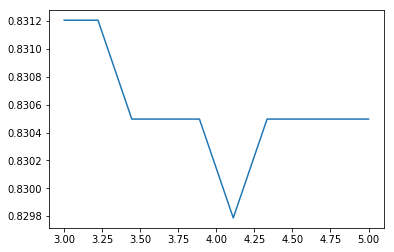

In [35]:
#更换模型
from sklearn.linear_model import LogisticRegression as LR
logclf = LR(solver="liblinear").fit(Xtrain, Ytrain)
logclf.score(Xtest,Ytest)
score=[]
C_range = np.linspace(3,5,10)
for C in C_range:
    logclf = LR(solver="liblinear",C=C).fit(Xtrain, Ytrain)
    score.append(logclf.score(Xtest,Ytest))
    print(C,logclf.score(Xtest,Ytest))
plt.plot(C_range,score)

In [33]:
import matplotlib.pyplot as plt

In [36]:
#调整支持向量机的c
import matplotlib.pyplot as plt
C_range = np.linspace(0.01,20,20)
recallall = []
aucall = []
scoreall = []
for C in C_range:
    times = time()
    clf = SVC(kernel = "linear",C=C
                ,class_weight = "balanced").fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    recallall.append(recall)
    aucall.append(auc)
    scoreall.append(score)
    print("under C %f, testing accuracy is %f,recall is %f', auc is %f" %(C,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))

under C 0.010000, testing accuracy is 0.782979,recall is 0.745283', auc is 0.855853
00:00:691022
under C 1.062105, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856086
00:04:042166
under C 2.114211, testing accuracy is 0.790071,recall is 0.761006', auc is 0.856049
00:06:727264
under C 3.166316, testing accuracy is 0.790780,recall is 0.764151', auc is 0.855982
00:09:394173
under C 4.218421, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855977
00:13:162814
under C 5.270526, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855945
00:15:752920
under C 6.322632, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855982
00:19:463809
under C 7.374737, testing accuracy is 0.790780,recall is 0.767296', auc is 0.855905
00:18:266158
under C 8.426842, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855830
00:20:508163
under C 9.478947, testing accuracy is 0.791489,recall is 0.767296', auc is 0.855807
00:22:834956
under C 10.531053, testing acc